# Natural Computing - Assignment 5 - Ensemble Learning
## Exercise 5
#### Submission by group 25 (Chihab Amghane, Max Driessen, Jordy Naus)

This file contains our code for exercise 5 of the "Ensemble Learning" assignment of the Natural Computing course.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from tqdm import tqdm

import os

## Importing data

In [3]:
def sex_to_num(string):
    if(string == 'male'):
        return 0
    return 1
def embarked_to_num(string,possibilities):
    return possibilities.index(string)


In [4]:
data_loc = '../../../ensemble_learning/titanic'
dataframe_train = pd.read_csv(os.path.join(data_loc,'train.csv'))

dataframe_train = dataframe_train.fillna(0)
unique_possibilities = list(dataframe_train['Embarked'].unique())
dataframe_train['Sex'] = dataframe_train['Sex'].apply(sex_to_num)
dataframe_train['Embarked'] = dataframe_train['Embarked'].apply(embarked_to_num, possibilities=unique_possibilities)
y = dataframe_train['Survived'].to_numpy()
dataframe_train = dataframe_train.drop(columns=['PassengerId','Survived','Name', 'Ticket','Cabin'])
X = dataframe_train.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [5]:
clf = RandomForestClassifier(max_depth=5, random_state=0, oob_score=True)


array([0, 1, 2, 3])

In [13]:
min_forest_size = 100
max_forest_size = 2500
forest_data = {forest_size:{} for forest_size in range(min_forest_size,max_forest_size+100)}
forest_predictions = {forest_size:[] for forest_size in range(min_forest_size,max_forest_size+100)}
for forest_size in tqdm(range(min_forest_size,max_forest_size+100,10)):
    clf.set_params(n_estimators=forest_size)
    clf.fit(X_train,y_train)
    data_dict = {}
    
    ## We are interested in accuracy,and oob scores
    predictions = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    oob_error = 1 - clf.oob_score_
    
    forest_predictions[forest_size] = predictions
    data_dict['accuracy'] = accuracy
    data_dict['oob_error'] = oob_error
    forest_data[forest_size] = data_dict

100%|██████████| 250/250 [10:46<00:00,  2.59s/it]


In [14]:
accuracies = [forest_data[x]['accuracy'] for x in range(min_forest_size,max_forest_size+100,10)]
oob_errors = [forest_data[x]['oob_error'] for x in range(min_forest_size,max_forest_size+100,10)]

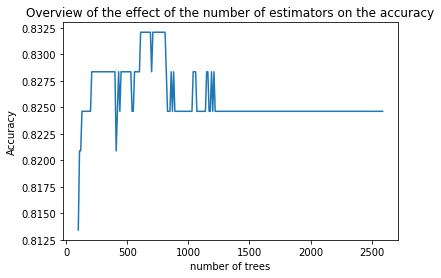

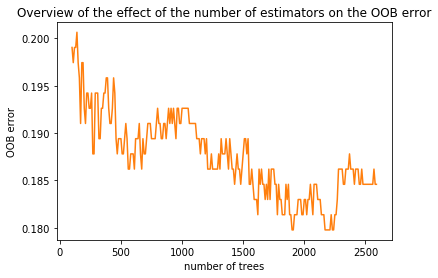

In [44]:
plt.plot(range(min_forest_size,max_forest_size+100,10),accuracies)
plt.title('Overview of the effect of the number of estimators on the accuracy')
plt.xlabel('number of trees')
plt.ylabel('Accuracy')
plt.show()
plt.plot(range(min_forest_size,max_forest_size+100,10),oob_errors,'tab:orange')
plt.title('Overview of the effect of the number of estimators on the OOB error')
plt.xlabel('number of trees')
plt.ylabel('OOB error')
plt.show()

In [47]:
print(f"The index of the highest accuracy {np.argmax(np.array(accuracies))}")
print(f"The index of the lowest ebo {np.argmin(np.array(oob_errors))}")
print(f"the number of trees {range(min_forest_size,max_forest_size+100,10)[51]}")
print(f"oob error {oob_errors[180]}")
print(accuracies[180])

The index of the highest accuracy 51
The index of the lowest ebo 180
the number of trees 610
oob error 0.1797752808988764
0.8246268656716418


In [38]:
min_nr_features = 1
max_nr_features = 7
features_forest_data = {forest_size:{} for forest_size in range(min_nr_features,max_nr_features+1)}
features_forest_predictions = {forest_size:[] for forest_size in range(min_nr_features,max_nr_features+1)}
for nr_of_features in tqdm(range(min_nr_features,max_nr_features)):
    clf.set_params(n_estimators=610, max_features = nr_of_features)
    clf.fit(X_train,y_train)
    data_dict = {}

    ## We are interested in accuracy,and oob scores
    predictions = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test)
    oob_error = 1 - clf.oob_score_

    features_forest_predictions[nr_of_features] = predictions
    data_dict['accuracy'] = accuracy
    data_dict['oob_error'] = oob_error
    features_forest_data[nr_of_features] = data_dict    




  0%|          | 0/6 [00:00<?, ?it/s]

0.8246268656716418
0.1910112359550562


100%|██████████| 6/6 [00:07<00:00,  1.20s/it]


In [39]:
feature_accuracies = [features_forest_data[x]['accuracy'] for x in range(min_nr_features,max_nr_features)]
feature_oob_errors = [features_forest_data[x]['oob_error'] for x in range(min_nr_features,max_nr_features)]

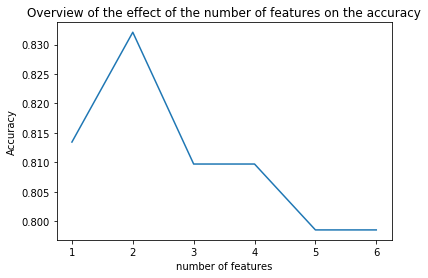

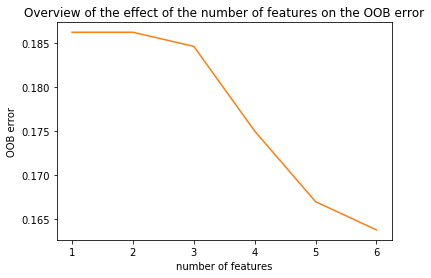

In [40]:
plt.plot(range(min_nr_features,max_nr_features),feature_accuracies)
plt.title('Overview of the effect of the number of features on the accuracy')
plt.xlabel('number of features')
plt.ylabel('Accuracy')
plt.show()
plt.plot(range(min_nr_features,max_nr_features),feature_oob_errors,'tab:orange')
plt.title('Overview of the effect of the number of features on the OOB error')
plt.xlabel('number of features')
plt.ylabel('OOB error')
plt.show()

## Best Model

In [41]:
clf.set_params(n_estimators=610, max_features = 2)
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
oob_error = 1 - clf.oob_score_


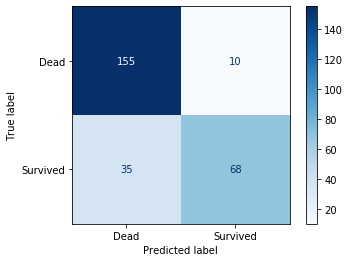

In [42]:
plot_confusion_matrix(clf,X_test,y_test, display_labels=['Dead','Survived'],values_format='0.5g', cmap=plt.cm.Blues)


In [43]:
print(classification_report(y_test,predictions, target_names=["Dead", "Survived"]))

              precision    recall  f1-score   support

        Dead       0.82      0.94      0.87       165
    Survived       0.87      0.66      0.75       103

    accuracy                           0.83       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.84      0.83      0.83       268



## Feature importance

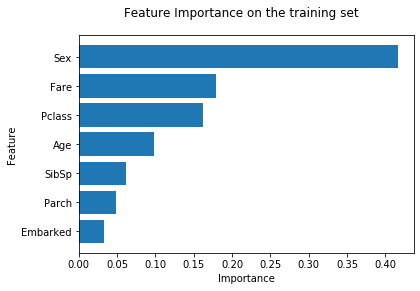

In [27]:
feature_importances = clf.feature_importances_
sorted_ids = np.argsort(feature_importances)
feature_names = dataframe_train.columns
fig,ax = plt.subplots()
y_ticks = range(0, len(feature_importances))
ax.barh(y_ticks,feature_importances[sorted_ids])
ax.set_yticklabels(feature_names[sorted_ids])
ax.set_yticks(y_ticks)
ax.set_ylabel('Feature')
ax.set_xlabel('Importance')
fig.suptitle('Feature Importance on the training set')
# fig.tight_layout()
plt.show()

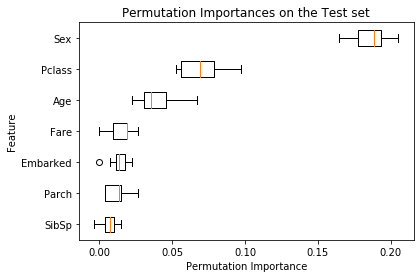

In [28]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10)
permutation_importances = result.importances_mean
sorted_ids = np.argsort(permutation_importances)
fix,ax = plt.subplots()
ax.boxplot(result.importances[sorted_ids].T, vert=False, labels=feature_names[sorted_ids])
ax.set_title('Permutation Importances on the Test set')
ax.set_ylabel('Feature')
ax.set_xlabel('Permutation Importance')
plt.show()